In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import DenseNet169, InceptionV3, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
img_height, img_width = 256,256
batch_size = 32

In [ ]:
train_data_dir = 'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_trainf'
test_data_dir = 'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf'

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cropping and Resizing Parameters
target_size = (256, 256)

# Data Augmentation Parameters
rotation_range = 360
horizontal_flip = True
shear_range = 0.2
zoom_range = 0.2

# Image Data Generator with Cropping and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip
)

# Generate augmented images and save them to the output directory
output_directory = 'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/output_augmented'
os.makedirs(output_directory, exist_ok=True)

i = 0
for batch in train_datagen.flow_from_directory(
    'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/train',
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    save_to_dir=output_directory,
    save_prefix='augmented',
    save_format='jpeg'
):
    i += 1
    if i > 5:  # Generate and save 5 augmented images
        break

print("Augmented images have been generated and saved to the output directory:", output_directory)


Found 7910 images belonging to 6 classes.
Augmented images have been generated and saved to the output directory: Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/output_augmented


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cropping and Resizing Parameters
target_size = (256, 256)

# Data Augmentation Parameters
rotation_range = 360
horizontal_flip = True
shear_range = 0.2
zoom_range = 0.2

# Image Data Generator with Cropping and Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=rotation_range,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=shear_range,
    zoom_range=zoom_range,
    horizontal_flip=horizontal_flip
)

# Output directory for augmented images
output_directory = 'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/output_augmentedf'
os.makedirs(output_directory, exist_ok=True)

# Iterate over each class and generate augmented images
class_directories =  os.listdir('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_trainf')
print(class_directories)


['early_leaf_spot_1', 'early_rust_1', 'healthy_leaf_1', 'late_leaf_spot_1', 'nutrition_deficiency_1', 'rust_1']


In [ ]:
import cv2

def load_and_process_image(img_path):
    # Load the image
    img = cv2.imread(img_path)

    # Resize the image to a specific size if needed
    img = cv2.resize(img, (256, 256))  # Replace desired_width and desired_height with the desired image size

    # Perform any additional preprocessing steps as required
    # For example, you can normalize the image by dividing by 255
    img = img / 255.0

    return img


In [ ]:
# Define the input and output directoriesinput_directory = 'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/train'  # Replace with the path to your input directory
output_directory = 'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/output_augmenetd'  # Replace with the path to your output directory
os.makedirs(output_directory, exist_ok=True)

# Augment the images and save them in separate subfolders for each class
for class_folder in os.listdir(input_directory):
    class_input_dir = os.path.join(input_directory, class_folder)
    class_output_dir = os.path.join(output_directory, class_folder)
    os.makedirs(class_output_dir, exist_ok=True)  # Create the class-specific output directory if it doesn't exist

    for image_file in os.listdir(class_input_dir):
        img_path = os.path.join(class_input_dir, image_file)
        img = load_and_process_image(img_path)  # Replace with the function to load and process the image
        img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels) as required by flow method
        i = 0
        for batch in train_datagen.flow(
            img,
            batch_size=1,
            save_to_dir=class_output_dir,
            save_prefix='aug',
            save_format='jpeg'
        ):
            i += 1
            if i > 3:  # Generate and save 5 augmented images for each input image
                break


In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
DenseNet169_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers of the pre-trained model
for layer in DenseNet169_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model
model = Sequential([
    DenseNet169_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Replace num_classes with the number of classes in your dataset
])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training and validation data
train_generator = train_datagen.flow_from_directory(
    'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_trainf',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 7910 images belonging to 6 classes.
Found 2451 images belonging to 6 classes.


In [ ]:
# Compile the model
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model using the testing data
history = model.fit(train_generator, epochs=20, validation_data=test_generator)
# Assuming that you have previously trained the model and set up the 'test_generator'

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
model.save('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/DenseNet169.h5')

C:\Users\Ramkumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 6s 6s/step


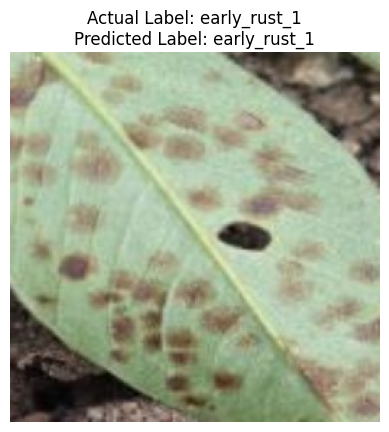

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained DenseNet-169 model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/DenseNet169.h5')

# Load the leaf image and resize it to 224x224
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/early_rust_1/dr_3_5905.jpg"
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)
# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "early_rust_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 6s 6s/step


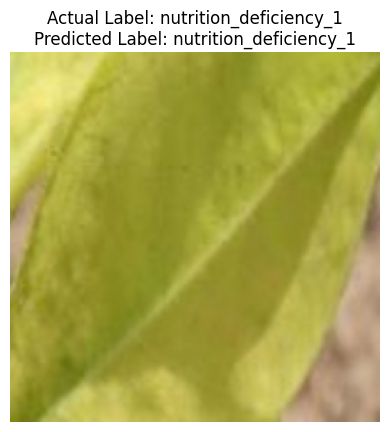

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained DenseNet-169 model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/DenseNet169.h5')

# Load the leaf image and resize it to 224x224
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/nutrition_deficiency_1/dr_1_6656.jpg"
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)
# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "nutrition_deficiency_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()


1/1 [==============================] - 4s 4s/step


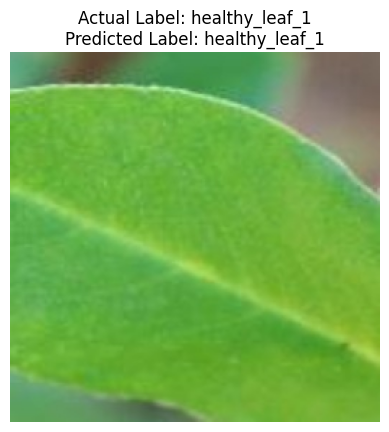

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained DenseNet-169 model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/DenseNet169.h5')

# Load the leaf image and resize it to 224x224
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/healthy_leaf_1/dr_2_1728.jpg"
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)
# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "healthy_leaf_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()

1/1 [==============================] - 4s 4s/step


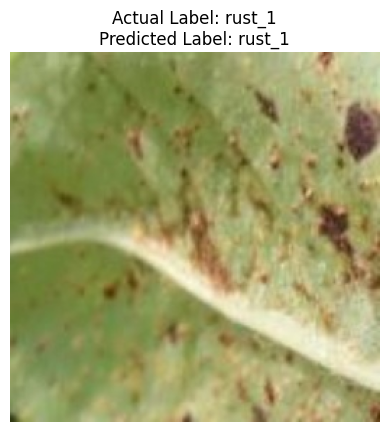

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained DenseNet-169 model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/DenseNet169.h5')

# Load the leaf image and resize it to 224x224
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/rust_1/dr_3_4684.jpg"
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)
# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "rust_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()

1/1 [==============================] - 7s 7s/step


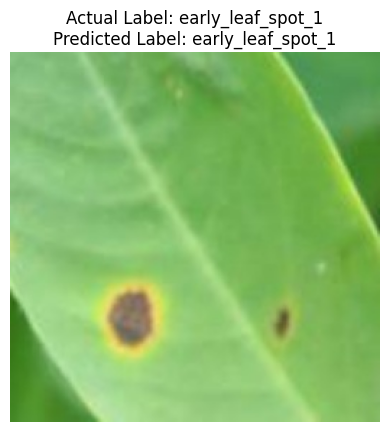

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained DenseNet-169 model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/DenseNet169.h5')

# Load the leaf image and resize it to 224x224
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/early_leaf_spot_1/dr_1_7852.jpg"
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)
# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "early_leaf_spot_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()

1/1 [==============================] - 4s 4s/step


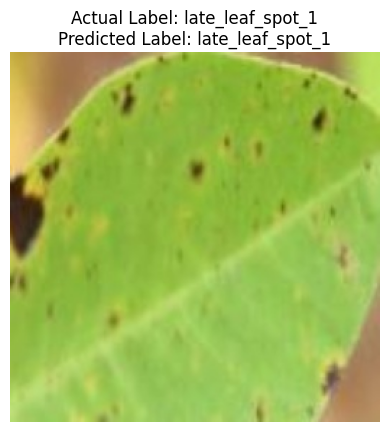

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image

# Load the pre-trained DenseNet-169 model from the .h5 file
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/DenseNet169.h5')

# Load the leaf image and resize it to 224x224
img_path = "Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/pretrained_testf/late_leaf_spot_1/dr_2_267.jpg"
img = image.load_img(img_path, target_size=(256, 256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions using the loaded model
preds = model.predict(x)
# Get the class label with the highest probability
predicted_class_index = np.argmax(preds)
class_labels = ["early_leaf_spot_1", "early_rust_1", "healthy_leaf_1", "late_leaf_spot_1", "nutrition_deficiency_1", "rust_1", "Unknown"]
predicted_class_label = class_labels[predicted_class_index]

# Actual label of the leaf image
actual_label = "late_leaf_spot_1"  # Replace with the actual label of the image

# Display the image along with the actual label and the final predicted label
plt.imshow(img)
plt.title(f"Actual Label: {actual_label}\nPredicted Label: {predicted_class_label}")
plt.axis('off')
plt.show()

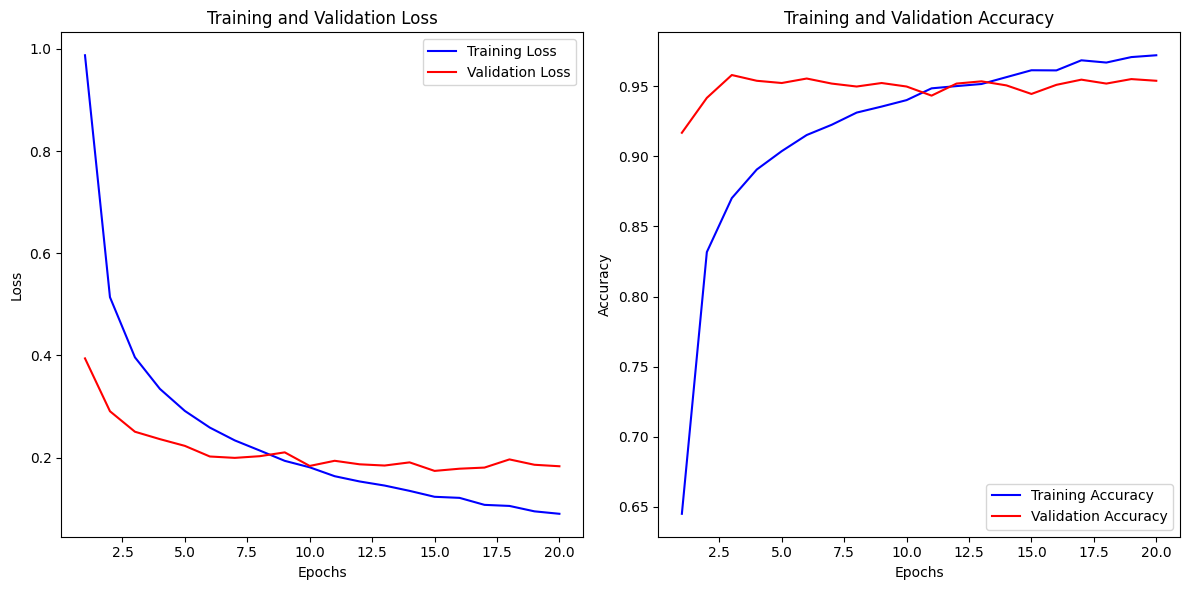

In [ ]:
import matplotlib.pyplot as plt

# Data from the training process
training_loss = [0.9877, 0.5140, 0.3962, 0.3344, 0.2912, 0.2586, 0.2335, 0.2137, 0.1935, 0.1808, 0.1634, 0.1531, 0.1451, 0.1347, 0.1231, 0.1210, 0.1073, 0.1052, 0.0946, 0.0898]
training_accuracy = [0.6450, 0.8317, 0.8702, 0.8906, 0.9037, 0.9152, 0.9225, 0.9312, 0.9355, 0.9401, 0.9485, 0.9501, 0.9516, 0.9565, 0.9614, 0.9613, 0.9685, 0.9669, 0.9708, 0.9721]

validation_loss = [0.3941, 0.2906, 0.2505, 0.2360, 0.2228, 0.2020, 0.1993, 0.2026, 0.2101, 0.1835, 0.1936, 0.1867, 0.1843, 0.1905, 0.1738, 0.1781, 0.1803, 0.1963, 0.1858, 0.1829]
validation_accuracy = [0.9168, 0.9417, 0.9580, 0.9539, 0.9523, 0.9555, 0.9519, 0.9498, 0.9523, 0.9498, 0.9433, 0.9519, 0.9535, 0.9506, 0.9445, 0.9510, 0.9547, 0.9519, 0.9551, 0.9539]

epochs = range(1, 21)  # Assuming 20 epochs

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
y_true = test_generator.classes

In [ ]:
from tensorflow.keras.models import load_model
predictions = []
labels = []
model = load_model('Documents/Groundnut_Leaf_dataset/Groundnut_Leaf_dataset/DenseNet169.h5')
# Get the total number of labels in generator
# (i.e. the length of the dataset where the generator generates batches from)
n = len(test_generator.labels)
print(n)

# Loop over the generator
for data, label in test_generator:
    # Make predictions on data using the model. Store the results.
    predictions.extend(model.predict(data).flatten())

    # Store corresponding labels
    labels.extend(label)

    # We have to break out from the generator when we've processed
    # the entire once (otherwise we would end up with duplicates).
    if (len(label) < test_generator.batch_size) and (len(predictions) == n):
        break

2451
1/1 [==============================] - 6s 6s/step
